### Importing Libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [111]:
df = pd.read_csv('loan_status.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Description

In [113]:
df.shape

(614, 13)

In [114]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [116]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [117]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [118]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

### Exploratory Data Analysis and Visualization

In [120]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [122]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [124]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [125]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


In [126]:
d1 = pd.get_dummies(df['Dependents'], drop_first = True).astype(int)
d2 = pd.get_dummies(df['Property_Area'], drop_first = True).astype(int)
df = pd.concat([df, d1, d2], axis = 1)

df = df.drop(['Dependents', 'Property_Area'], axis = 1)

In [127]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,1,2,3+,Semiurban,Urban
0,LP001002,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,0,0,0,1
1,LP001003,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,1,0,0,0,0
2,LP001005,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,0,0,0,1
3,LP001006,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,0,0,0,1
4,LP001008,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,0,0,0,1


In [128]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [129]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,1,2,3+,Semiurban,Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,1,0,0,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,0,0,0,1


<Axes: xlabel='Gender', ylabel='count'>

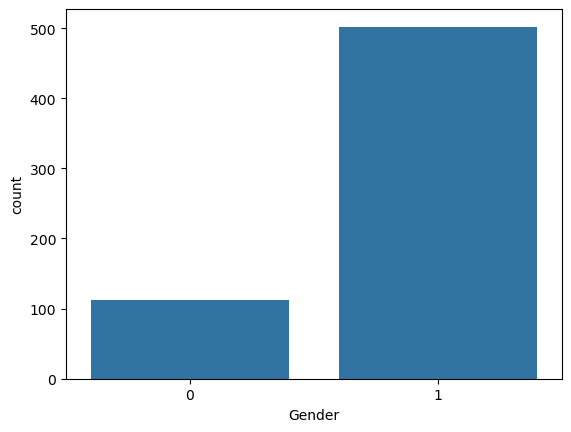

In [130]:
sns.countplot(data = df, x = 'Gender')

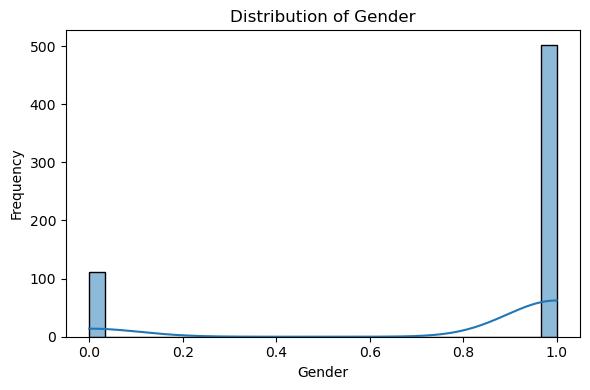

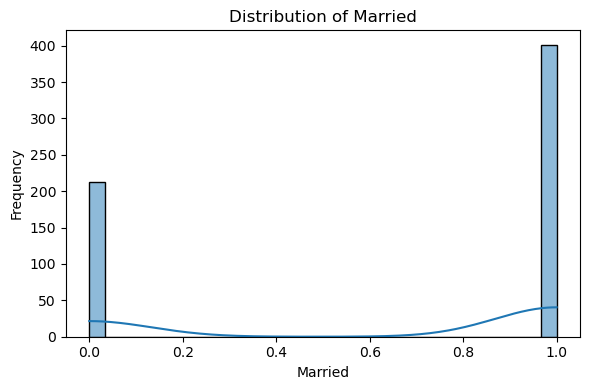

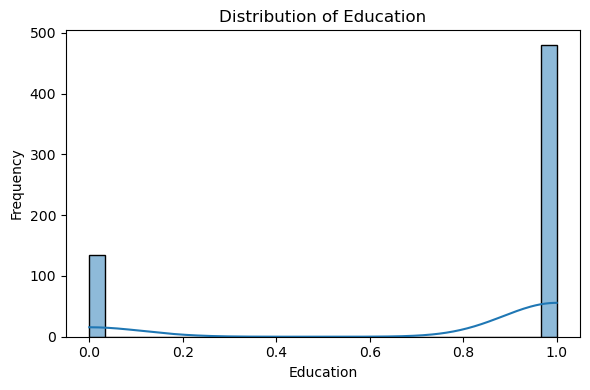

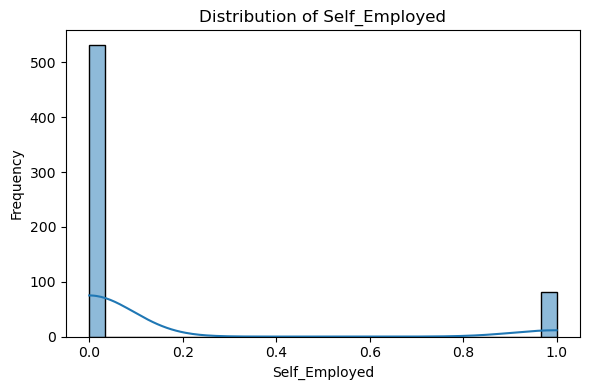

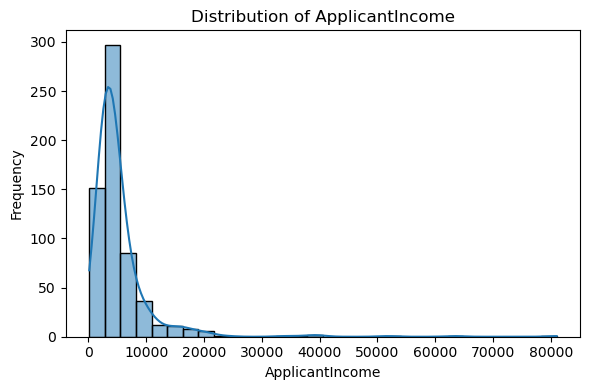

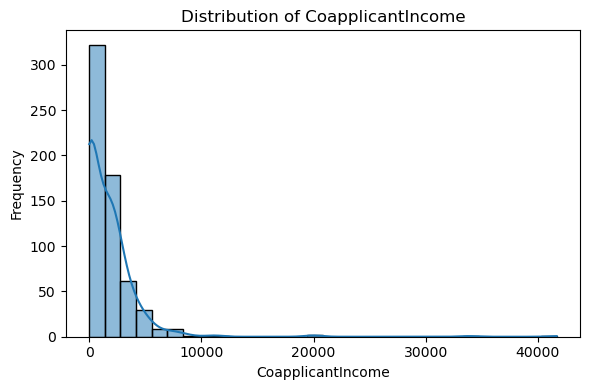

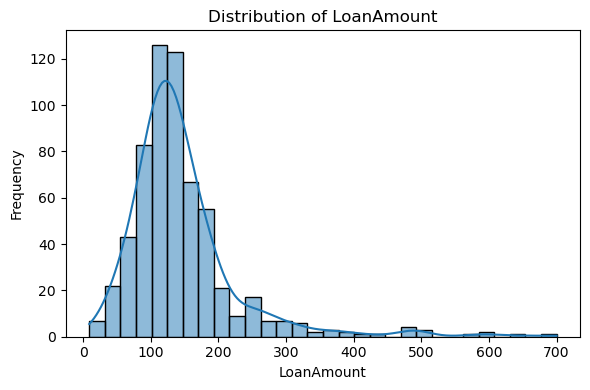

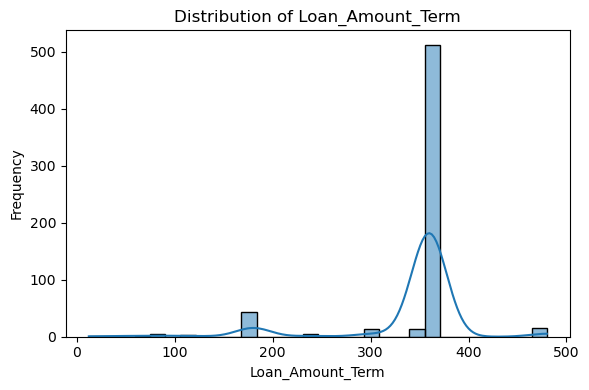

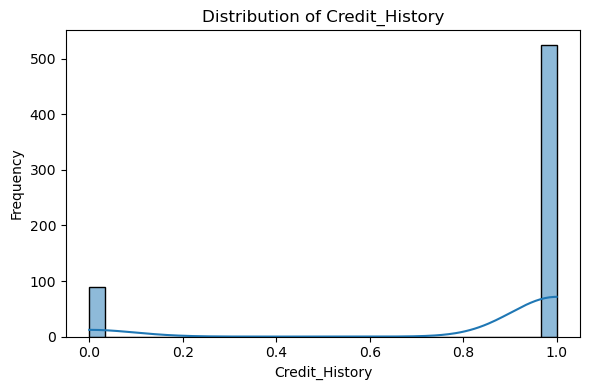

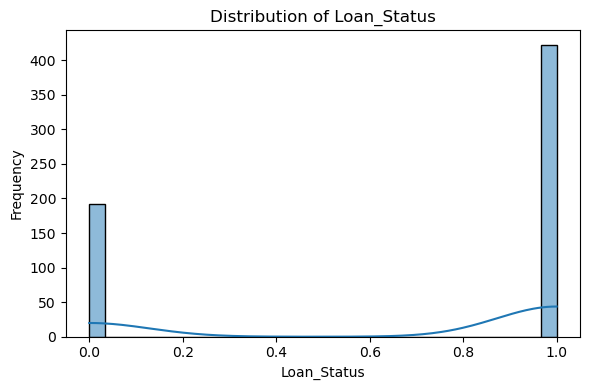

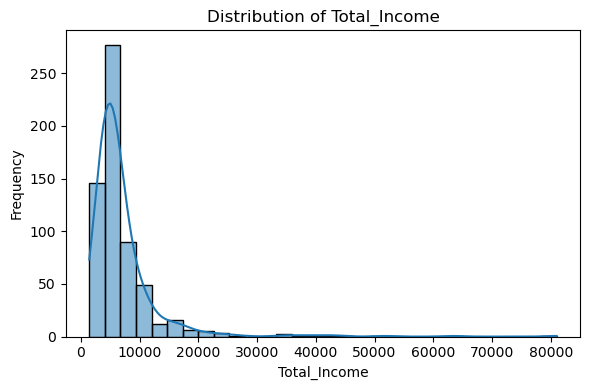

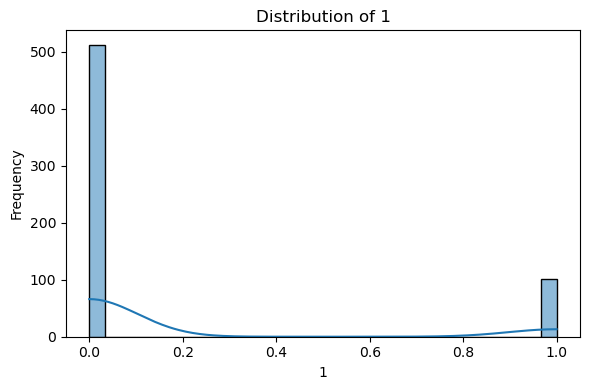

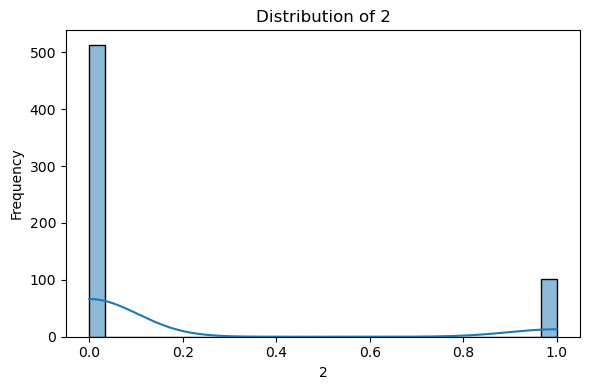

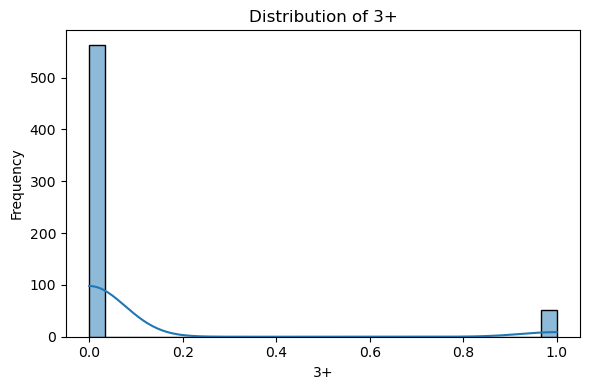

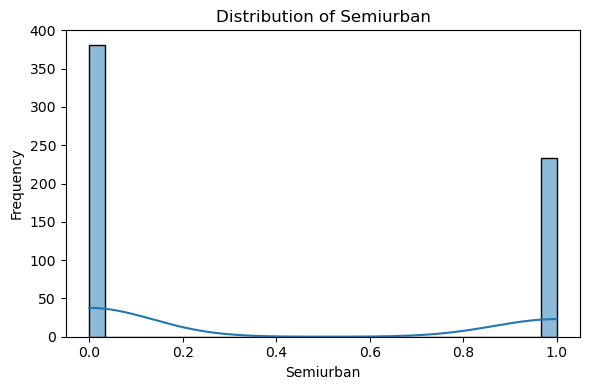

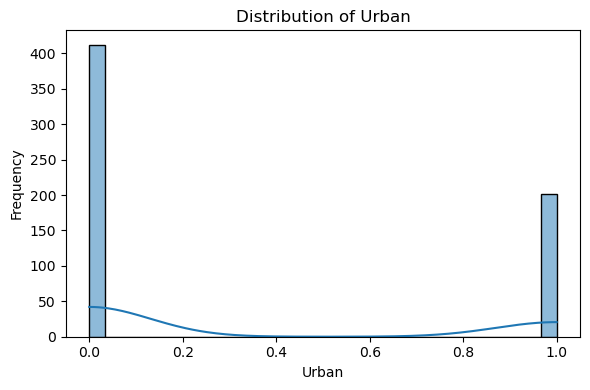

In [131]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [132]:
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])
df['Total_Income'] = np.log1p(df['Total_Income'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

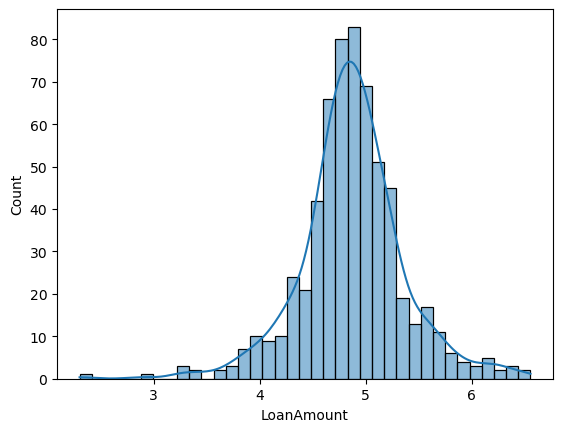

In [133]:
sns.histplot(data = df, x = 'LoanAmount', kde= True)

In [134]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,1,2,3+,Semiurban,Urban
0,1,0,1,0,8.674197,0.000000,4.993232,360.0,1.0,1,8.674197,0,0,0,0,1
1,1,1,1,0,8.430327,7.319202,4.859812,360.0,1.0,0,8.714732,1,0,0,0,0
2,1,1,1,1,8.006701,0.000000,4.204693,360.0,1.0,1,8.006701,0,0,0,0,1
3,1,1,0,0,7.857094,7.765993,4.795791,360.0,1.0,1,8.505525,0,0,0,0,1
4,1,0,1,0,8.699681,0.000000,4.955827,360.0,1.0,1,8.699681,0,0,0,0,1


### Spliting X and y

In [136]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [137]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,1,2,3+,Semiurban,Urban
0,1,0,1,0,8.674197,0.000000,4.993232,360.0,1.0,8.674197,0,0,0,0,1
1,1,1,1,0,8.430327,7.319202,4.859812,360.0,1.0,8.714732,1,0,0,0,0
2,1,1,1,1,8.006701,0.000000,4.204693,360.0,1.0,8.006701,0,0,0,0,1
3,1,1,0,0,7.857094,7.765993,4.795791,360.0,1.0,8.505525,0,0,0,0,1
4,1,0,1,0,8.699681,0.000000,4.955827,360.0,1.0,8.699681,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,7.972811,0.000000,4.276666,360.0,1.0,7.972811,0,0,0,0,0
610,1,1,1,0,8.320448,0.000000,3.713572,180.0,1.0,8.320448,0,0,1,0,0
611,1,1,1,0,8.996280,5.484797,5.537334,360.0,1.0,9.025576,1,0,0,0,1
612,1,1,1,0,8.933796,0.000000,5.236442,360.0,1.0,8.933796,0,1,0,0,1


In [138]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Splitting into training and test set

#### 1. Logistic Regression

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Training the model

In [143]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\uk035\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
y_pred1 = model1.predict(X_test)
print(model1.score(X_test, y_test))

0.7886178861788617


In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### 2. RandomForest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
y_pred2 = model2.predict(X_test)
print(model2.score(X_test, y_test))

0.7886178861788617


#### 3. SVC

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

cv = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,              
    scoring='accuracy',
    verbose=1,
    n_jobs=-1           
)
cv.fit(X_train_scaled, y_train)

print("Best Parameters:", cv.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.8145949288806431


In [170]:
from sklearn.svm import SVC
model3 = SVC(degree = 1, gamma = 'scale', kernel = 'linear')
model3.fit(X_train_scaled, y_train)

SVC(degree=1, kernel='linear')

In [178]:
print(model3.score(scaler.transform(X_test), y_test))

0.7886178861788617


#### KNeighbors Classifier

In [184]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [186]:
print(model4.score(scaler.transform(X_test), y_test))

0.7642276422764228


### Saving the model

In [193]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(model2, file)
file.close()